# **Optimización del consumo de energía en una Smart Home**

# **Objetivo:** Desarrollar un modelo de machine learning que optimice el consumo de energía en una casa inteligente (smart home) mediante la integración y predicción de la generación de energía a partir de fuentes limpias.

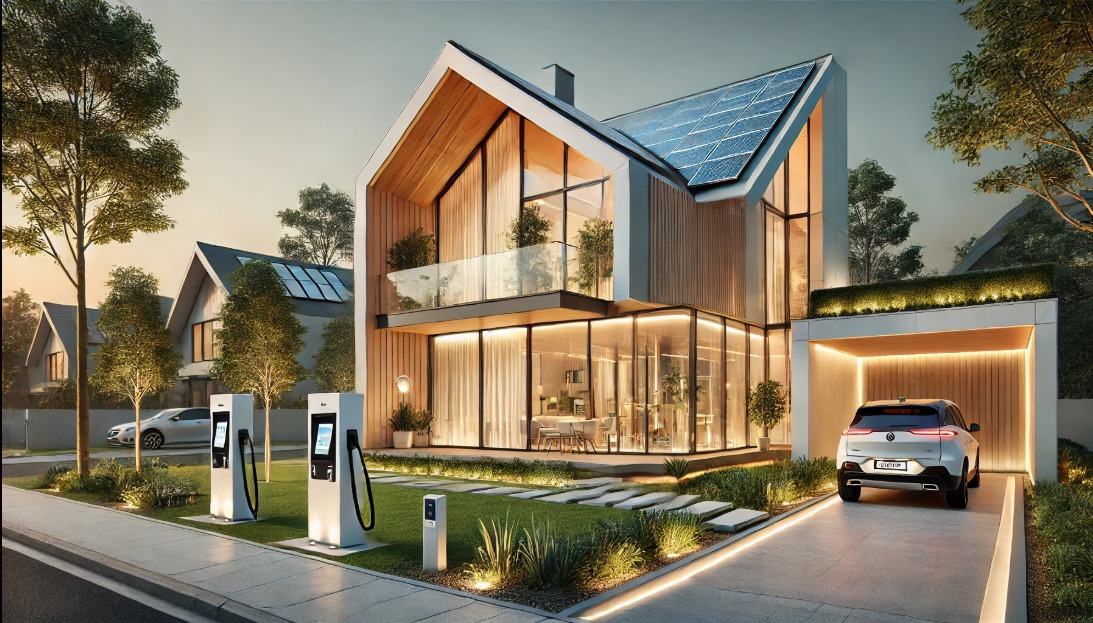

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #para la creación de gráficos y visualizaciones
import seaborn as sns #crea visualizaciones estadísticas de alta calidad rápidamente y con una sintaxis simple

import plotly.express as px #diseñada para facilitar la creación de visualizaciones interactivas y atractivas en Python
import scipy.stats as stats #es una herramienta fundamental en el análisis de datos y la estadística en Python.

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

import holoviews as hv #permite crear gráficos interactivos que facilitan la exploración de patrones y relaciones en los datos.

from holoviews import opts

from matplotlib import pyplot as plt

import os
!pip install changefinder
import changefinder #Es especialmente adecuada para identificar patrones anómalos o puntos de cambio que puedan ser relevantes para la toma de decisiones.
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
!pip install prophet

from sklearn.metrics import mean_absolute_error
import shap
shap.initjs()
import lightgbm as lgb #es una poderosa herramienta para tareas de aprendizaje automático, especialmente cuando se trata de grandes volúmenes de datos y cuando la eficiencia y la velocidad son esenciales
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from IPython.display import HTML, display
!pip install prophet
import prophet # changed from fbprophet to prophet

import warnings
warnings.filterwarnings("ignore")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.0 MB/s eta 0:00:00
  Created wheel for changefinder: filename=changefinder-0.3-py3-none-any.whl size=3824 sha256=128eba820eca7abfc84004b9a21f0db46288f98f53e22095d250a2898742fdb2
  Stored in directory: /root/.cache/pip/wheels/f2/fa/e8/f408bd08e5ec7efe062c717bc3997bde871f42a2dc1e133b2b
Successfully built changefinder


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Time -  Tiempo
Dishwasher - Lavavajillas
Home Office - Oficina En Casa
Fridge - Nevera
Wine Cellar - Bodega
Garage Door - Puerta De Garaje
Barn - Granero
Well - Pozo
Microwave - Microondas
Living Room - Sala De Estar
Temperature - Temperatura
Humidity -Humedad
Visibility - Visibilidad
Apparenttemperature - Temperatura Aparente
Pressure - Presión
Windspeed Velocidad Del Viento
Cloudcover - Nubosidad
Windbearing -  Vientoportador
Precipintensity - Precipintensidad
Dewpoint  - Dewpoint
Precipprobability - Probabilidad De Precio
Furnace - Horno
Kitchen - Cocina
Year - Año
Month - Mes
Day  Weekday -  Día De La Semana
Weekofyear - Semanadelaño
Hour -  Hora
Minute - Minuto
Timing – Tiempo
Use_HO - Use_HO',  
Gen_Sol - Gen_Sol


In [2]:
home = pd.read_csv('/content/Data/HomeC.csv')
# Hacer una copia del DataSet original
df = home.copy()



In [3]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
df.sample(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
139757,1451764157,0.785167,0.003600,0.785167,0.000050,0.491267,0.077767,0.041117,0.005150,0.013417,...,10.0,Clear,27.33,1024.75,10.47,0.0,319.0,0.0,9.78,0.0
446032,1452070432,0.777133,0.004167,0.777133,0.000000,0.020033,0.063517,0.042200,0.133083,0.007933,...,10.0,Clear,59.85,1017.50,2.14,0.03,304.0,0.0,36.84,0.0
132751,1451757151,0.402800,0.003400,0.402800,0.000017,0.062933,0.101917,0.041767,0.005100,0.022600,...,10.0,Clear,8.75,1026.10,14.37,0.08,13.0,0.0,5.35,0.0
164917,1451789317,0.060267,0.450433,0.060267,0.000000,0.019800,0.062617,0.039150,0.005033,0.122667,...,10.0,Clear,53.35,1017.34,3.38,0.0,321.0,0.0,15.86,0.0
262321,1451886721,0.476367,0.003400,0.476367,0.000283,0.020583,0.066200,0.042150,0.151333,0.008317,...,10.0,Clear,86.52,1008.29,3.85,0.04,164.0,0.0,69.41,0.0


In [5]:
# Conocer en Detalle la estructura del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [6]:
# Calculemos cuanto datos nulos hay, y mostremos un porcentaje de esos datos nulos si se encuentran presentes
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

,Cuantos Nulos,Porcentaje
time,0,0.0
use [kW],1,0.0
gen [kW],1,0.0
House overall [kW],1,0.0
Dishwasher [kW],1,0.0
Furnace 1 [kW],1,0.0
Furnace 2 [kW],1,0.0
Home office [kW],1,0.0
Fridge [kW],1,0.0
Wine cellar [kW],1,0.0


In [7]:
# Estadisticas Básicas que se pueden aplicar a las columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
use [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567
gen [kW],503910.0,0.076229,0.128428,0.000000,0.003367,0.004283,0.083917,0.613883
House overall [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567
Dishwasher [kW],503910.0,0.031368,0.190951,0.000000,0.000000,0.000017,0.000233,1.401767
Furnace 1 [kW],503910.0,0.099210,0.169059,0.000017,0.020233,0.020617,0.068733,1.934083
Furnace 2 [kW],503910.0,0.136779,0.178631,0.000067,0.064400,0.066633,0.080633,0.794933
Home office [kW],503910.0,0.081287,0.104466,0.000083,0.040383,0.042217,0.068283,0.971750
Fridge [kW],503910.0,0.063556,0.076199,0.000067,0.005083,0.005433,0.125417,0.851267
Wine cellar [kW],503910.0,0.042137,0.057967,0.000017,0.007133,0.008083,0.053192,1.273933
Garage door [kW],503910.0,0.014139,0.014292,0.000017,0.012733,0.012933,0.013100,1.088983


In [8]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [9]:
df.columns = [i.replace(' [kW]', '') for i in df.columns]

In [10]:
#Hay varias columnas en Mobiliario y Cocina. Para simplificar, las he agregado en una nueva columna sumándolas.
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)

In [11]:
#Hay una fila que contiene NaN
df[df.isnull().any(axis=1)]

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [12]:
#La última fila contiene NaN, así que la eliminamos de los datos.
df = df[0:-1]

In [13]:
#Se ha encontrado el valor 'cloudCover' en la columna(58 filas). Tal vez se trate de un error en la recogida de datos.

df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [14]:
df[df['cloudCover']=='cloudCover'].shape

(58, 27)

In [15]:
#Así que vamos a reemplazar estos valores no válidos con el siguiente valor válido.
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')

In [16]:
#Después de convertir unixtimestamp, se encontró que el paso del tiempo está en incrementos de segundos,
#aunque los datos se recogieron con un lapso de tiempo de 1 minuto.
pd.to_datetime(df['time'], unit='s').head(3)

,time
0,2016-01-01 05:00:00
1,2016-01-01 05:00:01
2,2016-01-01 05:00:02


In [17]:
#Necesitamos crear un nuevo rango de fechas en incrementos de minutos
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


In [18]:
#Para utilizar la información de fecha y hora, como el año, el mes y el día, en la fase EDA y de modelado,
# necesitamos extraerla de la columna de tiempo.
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.weekofyear)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,precipProbability,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,0.0,0.082617,0.000567,2016,1,1,Friday,53,5,0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,0.0,0.084533,0.000567,2016,1,1,Friday,53,5,1
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,0.0,0.083017,0.000617,2016,1,1,Friday,53,5,2


In [19]:
#La variable horaria puede dividirse en Noche, Mañana, Tarde y Noche en función de su número.
#Noche : 22:00 - 23:59 / 00:00 - 03:59
#Mañana : 04:00 - 11:59
#Tarde : 12:00 - 16:59
#Noche : 17:00 - 21:59
#Podemos crear una variable de tiempo basada en una variable de hora.
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [20]:
df['timing'] = df['hour'].apply(hours2timing)
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute,timing
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,0.082617,0.000567,2016,1,1,Friday,53,5,0,Morning
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,0.084533,0.000567,2016,1,1,Friday,53,5,1,Morning
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,0.083017,0.000617,2016,1,1,Friday,53,5,2,Morning


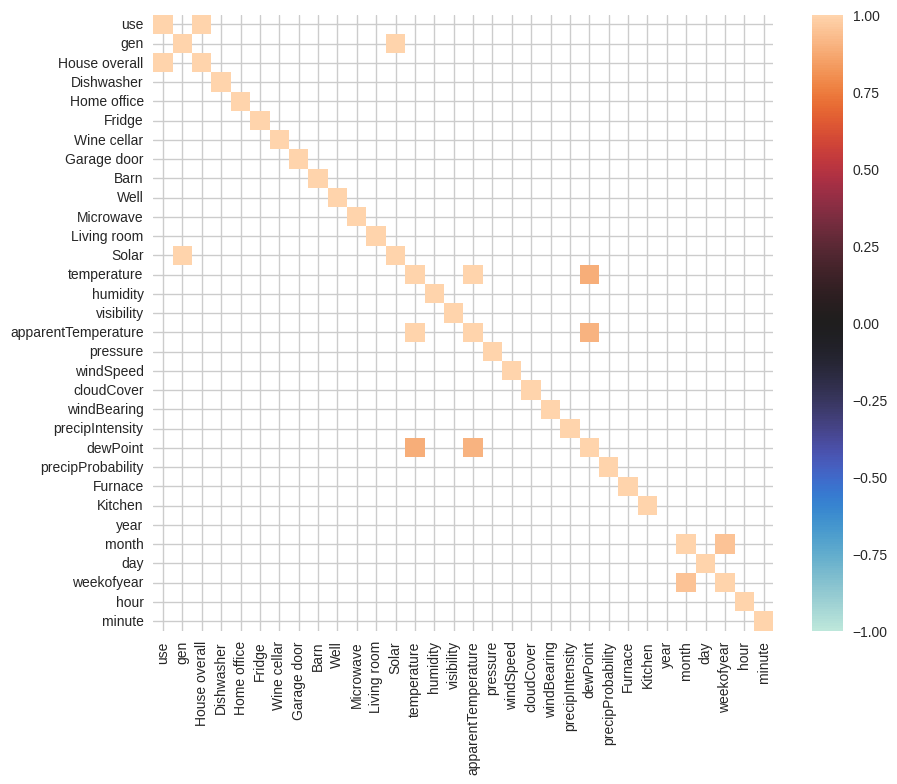

In [21]:
#Según la información del conjunto de datos, puede haber algunas columnas similares.
fig = plt.subplots(figsize=(10, 8))
# Only include numerical features for correlation calculation
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr[corr>0.8], vmax=1, vmin=-1, center=0)
plt.show()

En el anterior mapa de calor se presenta una mayor correlación entre características como la temperatura, temperatura aparente y punto de rocío.

In [22]:
#El coeficiente de correlación entre las columnas «uso», «vivienda en general», «gen» y «solar» es casi superior a 0,95,
#por lo que debemos agruparlas en una nueva columna.
df['use_HO'] = df['use']
df['gen_Sol'] = df['gen']
df.drop(['use','House overall','gen','Solar'], axis=1, inplace=True)
df.head(3)

,time,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,year,month,day,weekday,weekofyear,hour,minute,timing,use_HO,gen_Sol
0,2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,2016,1,1,Friday,53,5,0,Morning,0.932833,0.003483
1,2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,2016,1,1,Friday,53,5,1,Morning,0.934333,0.003467
2,2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,2016,1,1,Friday,53,5,2,Morning,0.931817,0.003467


In [23]:
df.columns

Index(['time', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
       'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'Furnace', 'Kitchen', 'year', 'month',
       'day', 'weekday', 'weekofyear', 'hour', 'minute', 'timing', 'use_HO',
       'gen_Sol'],
      dtype='object')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
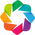

:Layout
   .Distribution.I  :Distribution   [use_HO]   (Density)
   .Distribution.II :Distribution   [gen_Sol]   (Density)

In [24]:
!pip install holoviews bokeh
import holoviews as hv
from holoviews import opts
hv.extension('bokeh') # Initialize the bokeh backend
use = hv.Distribution(df['use_HO']).opts(title="Total Energy Consumption Distribution", color="red")
gen = hv.Distribution(df['gen_Sol']).opts(title="Total Energy Generation Distribution", color="blue")
(use + gen).opts(opts.Distribution(xlabel="Energy Consumption", ylabel="Density", xformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True))

Gráfico 1:  Distribución del Consumo Total de Energía
 * Forma: La curva tiene una forma asimétrica, con un pico pronunciado alrededor de los 0.5 kW y luego disminuye gradualmente.
 * Interpretación: Esto sugiere que la mayor parte de los dispositivos o sistemas consumen una cantidad relativamente baja de energía, concentrada alrededor de los 0.5 kW.

Gráfico 2: Distribución de la Generación Total de Energía
 * Forma: La curva también es asimétrica, pero con un pico más pronunciado y desplazado hacia la izquierda, alrededor de los 0.2 kW.
 * Interpretación: Este gráfico indica que la mayoría de los dispositivos o sistemas generan una cantidad muy pequeña de energía, cercana a los 0.2 kW.

 Por lo tanto, es mayor la energía que se consume que aquella que se genera a partir de otras fuentes de energía.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
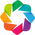

:Overlay
   .Distribution.Dishwasher          :Distribution   [Dishwasher]   (Density)
   .Distribution.Home_office         :Distribution   [Home office]   (Density)
   .Distribution.Fridge_Distribution :Distribution   [Fridge]   (Density)
   .Distribution.Wine_cellar         :Distribution   [Wine cellar]   (Density)
   .Distribution.Garage_door         :Distribution   [Garage door]   (Density)
   .Distribution.Barn                :Distribution   [Barn]   (Density)
   .Distribution.Well                :Distribution   [Well]   (Density)
   .Distribution.Microwave           :Distribution   [Microwave]   (Density)
   .Distribution.Living_room         :Distribution   [Living room]   (Density)
   .Distribution.Furnace             :Distribution   [Furnace]   (Density)
   .Distribution.Kitchen             :Distribution   [Kitchen]   (Density)

In [25]:
!pip install holoviews bokeh
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')  # or hv.extension('matplotlib')

#Electrodomésticos
dw = hv.Distribution(df[df['Dishwasher']<1.5]['Dishwasher'],label="Dishwasher").opts(color="red")
ho = hv.Distribution(df[df['Home office']<1.5]['Home office'],label="Home office").opts(color="blue")
fr = hv.Distribution(df[df['Fridge']<1.5]['Fridge'],label="Fridge Distribution").opts(color="orange")
wc = hv.Distribution(df[df['Wine cellar']<1.5]['Wine cellar'],label="Wine cellar").opts(color="green")
gd = hv.Distribution(df[df['Garage door']<1.5]['Garage door'],label="Garage door").opts(color="purple")
ba = hv.Distribution(df[df['Barn']<1.5]['Barn'],label="Barn").opts(color="grey")
we = hv.Distribution(df[df['Well']<1.5]['Well'],label="Well").opts(color="pink")
mcr = hv.Distribution(df[df['Microwave']<1.5]['Microwave'],label="Microwave").opts(color="yellow")
lr = hv.Distribution(df[df['Living room']<1.5]['Living room'],label="Living room").opts(color="brown")
fu = hv.Distribution(df[df['Furnace']<1.5]['Furnace'],label="Furnace").opts(color="skyblue")
ki = hv.Distribution(df[df['Kitchen']<1.5]['Kitchen'],label="Kitchen").opts(color="lightgreen")

# Use hv.opts.Distribution instead of opts.Distribution
(dw * ho * fr * wc * gd * ba * we * mcr * lr * fu * ki).opts(hv.opts.Distribution(xlabel="Energy Consumption", ylabel="Density", xformatter='%.1fkw',title='Energy Consumption of Appliances Distribution', \
                                                                               width=800, height=350,tools=['hover'],show_grid=True))

Los dispositivos que se utilizan con mayor frecuencia corresponden a la cocina, el microondas, la sala de estar y la fuente.

In [26]:
#Información metereológica
temp = hv.Distribution(df['temperature'],label="temperature").opts(color="red")
apTemp = hv.Distribution(df['apparentTemperature'],label="apparentTemperature").opts(color="orange")
temps = (temp * apTemp).opts(opts.Distribution(title='Temperature Distribution')).opts(legend_position='top',legend_cols=2)
hmd = hv.Distribution(df['humidity']).opts(color="yellow", title='Humidity Distribution')
vis = hv.Distribution(df['visibility']).opts(color="blue", title='Visibility Distribution')
prs = hv.Distribution(df['pressure']).opts(color="green", title='Pressure Distribution')
wnd = hv.Distribution(df['windSpeed']).opts(color="purple", title='WindSpeed Distribution')
cld = hv.Distribution(df['cloudCover']).opts(color="grey", title='CloudCover Distribution')
prc = hv.Distribution(df['precipIntensity']).opts(color="skyblue", title='PrecipIntensity Distribution')
dew = hv.Distribution(df['dewPoint']).opts(color="lightgreen", title='DewPoint Distribution')

(temps + hmd + vis + prs + wnd + cld + prc + dew).opts(opts.Distribution(xlabel="Values", ylabel="Density", width=400, height=300,tools=['hover'],show_grid=True)).cols(4)

:Layout
   .Overlay.I        :Overlay
      .Distribution.Temperature         :Distribution   [temperature]   (Density)
      .Distribution.ApparentTemperature :Distribution   [apparentTemperature]   (Density)
   .Distribution.I   :Distribution   [humidity]   (Density)
   .Distribution.II  :Distribution   [visibility]   (Density)
   .Distribution.III :Distribution   [pressure]   (Density)
   .Distribution.IV  :Distribution   [windSpeed]   (Density)
   .Distribution.V   :Distribution   [cloudCover]   (Density)
   .Distribution.VI  :Distribution   [precipIntensity]   (Density)
   .Distribution.VII :Distribution   [dewPoint]   (Density)

In [27]:
#Funciones útiles para agrupar
def groupByMonth(col):
    return df[[col,'month']].groupby('month').agg({col:['mean']})[col]

In [28]:
def groupByWeekday(col):
    weekdayDf = df.groupby('weekday').agg({col:['mean']})
    weekdayDf.columns = [f"{i[0]}_{i[1]}" for i in weekdayDf.columns]
    weekdayDf['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekdayDf.index]
    weekdayDf.sort_values('week_num', inplace=True)
    weekdayDf.drop('week_num', axis=1, inplace=True)
    return weekdayDf

In [29]:
def groupByTiming(col):
    timingDf = df.groupby('timing').agg({col:['mean']})
    timingDf.columns = [f"{i[0]}_{i[1]}" for i in timingDf.columns]
    timingDf['timing_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in timingDf.index]
    timingDf.sort_values('timing_num', inplace=True)
    timingDf.drop('timing_num', axis=1, inplace=True)
    return timingDf

In [30]:
df = df.set_index(df['time'])
use = hv.Curve(df['use_HO'].resample('D').mean()).opts(title="Total Energy Consumption Time-Series by Day", color="red", ylabel="Energy Consumption")
gen = hv.Curve(df['gen_Sol'].resample('D').mean()).opts(title="Total Energy Generation Time-Series by Day", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Day", yformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True,fontsize={'title':11}))

:Layout
   .Curve.I  :Curve   [time]   (use_HO)
   .Curve.II :Curve   [time]   (gen_Sol)

El 29 de agosto se consumió mayor cantidad de energía en comparación con los demás días, aproximadamente 3.5kw.

El 27 de abril se generó mayor cantidad de energía, aproximadamente 0.15kw.

In [31]:
use = hv.Curve(groupByMonth('use_HO')).opts(title="Total Energy Consumption Time-Series by Month", color="red", ylabel="Energy Consumption")
gen = hv.Curve(groupByMonth('gen_Sol')).opts(title="Total Energy Generation Time-Series by Month", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Month", yformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True,fontsize={'title':10})).opts(shared_axes=False)

:Layout
   .Curve.I  :Curve   [month]   (mean)
   .Curve.II :Curve   [month]   (mean)

- El consumo de energía alcanza su máximo de julio a septiembre.
- La generación de energía no tiene picos significativos, sino que aumenta gradualmente de enero a julio y luego disminuye lentamente.

In [32]:
use = hv.Curve(groupByWeekday('use_HO')).opts(title="Total Energy Consumption Time-Series by Weekday", color="red", ylabel="Energy Consumption")
gen = hv.Curve(groupByWeekday('gen_Sol')).opts(title="Total Energy Generation Time-Series by Weekday", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Weekday", yformatter='%.2fkw', width=400, height=300,tools=['hover'],show_grid=True, xrotation=20,fontsize={'title':10})).opts(shared_axes=False)

:Layout
   .Curve.I  :Curve   [weekday]   (use_HO_mean)
   .Curve.II :Curve   [weekday]   (gen_Sol_mean)

- Intuitivamente, se piensa que no hay una tendencia semanal en el consumo y la generación de energía.
- En realidad, parece haber una ligera tendencia, pero el cambio de valor es insignificante y puede ignorarse.

In [33]:
use = hv.Curve(groupByTiming('use_HO')).opts(title="Total Energy Consumption Time-Series by Timing", color="red", ylabel="Energy Consumption")
gen = hv.Curve(groupByTiming('gen_Sol')).opts(title="Total Energy Generation Time-Series by Timing", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Timing", yformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True,fontsize={'title':10})).opts(shared_axes=False)

:Layout
   .Curve.I  :Curve   [timing]   (use_HO_mean)
   .Curve.II :Curve   [timing]   (gen_Sol_mean)

El consumo de energía alcanza su máximo en la noche.

La generación de energía alcanza su máximo entre las horas de la mañana y de la tarde.

In [34]:
dw = hv.Curve(df['Dishwasher'].resample('D').mean(),label="Dishwasher Time-Series by Day").opts(color="red")
ho = hv.Curve(df['Home office'].resample('D').mean(),label="Home office Time-Series by Day").opts(color="blue")
fr = hv.Curve(df['Fridge'].resample('D').mean(),label="Fridge Time-Series by Day").opts(color="orange")
wc = hv.Curve(df['Wine cellar'].resample('D').mean(),label="Wine cellar Time-Series by Day").opts(color="green")
gd = hv.Curve(df['Garage door'].resample('D').mean(),label="Garage door Time-Series by Day").opts(color="purple")
ba = hv.Curve(df['Barn'].resample('D').mean(),label="Barn Time-Series by Day").opts(color="grey")
we = hv.Curve(df['Well'].resample('D').mean(),label="Well Time-Series by Day").opts(color="pink")
mcr = hv.Curve(df['Microwave'].resample('D').mean(),label="Microwave Time-Series by Day").opts(color="yellow")
lr = hv.Curve(df['Living room'].resample('D').mean(),label="Living room Time-Series by Day").opts(color="brown")
fu = hv.Curve(df['Furnace'].resample('D').mean(),label="Furnace Time-Series by Day").opts(color="skyblue")
ki = hv.Curve(df['Kitchen'].resample('D').mean(),label="Kitchen Time-Series by Day").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Day", ylabel="Energy Consumption", yformatter='%.2fkw' , \
                                                                               width=400, height=300,tools=['hover'],show_grid=True)).cols(6)

:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Day  :Curve   [time]   (Dishwasher)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Home office)
   .Curve.Fridge_Time_hyphen_minus_Series_by_Day      :Curve   [time]   (Fridge)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Wine cellar)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Garage door)
   .Curve.Barn_Time_hyphen_minus_Series_by_Day        :Curve   [time]   (Barn)
   .Curve.Well_Time_hyphen_minus_Series_by_Day        :Curve   [time]   (Well)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Day   :Curve   [time]   (Microwave)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Living room)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Day     :Curve   [time]   (Furnace)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Day     :Curve   [time]   (Kitchen)

La oficina en casa, el frigorífico, la bodega, el salón y el mobiliario tienen claramente tendencias temporales.
Esto se debe a que estos aparatos necesitan mantener constante la temperatura interior o ajustarla a una temperatura confortable según la estación del año.

In [35]:
dw = hv.Curve(groupByMonth('Dishwasher'),label="Dishwasher Time-Series by Month").opts(color="red")
ho = hv.Curve(groupByMonth('Home office'),label="Home office Time-Series by Month").opts(color="blue")
fr = hv.Curve(groupByMonth('Fridge'),label="Fridge Time-Series by Month").opts(color="orange")
wc = hv.Curve(groupByMonth('Wine cellar'),label="Wine cellar Time-Series by Month").opts(color="green")
gd = hv.Curve(groupByMonth('Garage door'),label="Garage door Time-Series by Month").opts(color="purple")
ba = hv.Curve(groupByMonth('Barn'),label="Barn Time-Series by Month").opts(color="grey")
we = hv.Curve(groupByMonth('Well'),label="Well Time-Series by Month").opts(color="pink")
mcr = hv.Curve(groupByMonth('Microwave'),label="Microwave Time-Series by Month").opts(color="yellow")
lr = hv.Curve(groupByMonth('Living room'),label="Living room Time-Series by Month").opts(color="brown")
fu = hv.Curve(groupByMonth('Furnace'),label="Furnace Time-Series by Month").opts(color="skyblue")
ki = hv.Curve(groupByMonth('Kitchen'),label="Kitchen Time-Series by Month").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Month", ylabel="Energy Consumption", yformatter='%.2fkw', \
                                                                               width=400, height=300,tools=['hover'],show_grid=True)).opts(shared_axes=False).cols(6)

:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Month  :Curve   [month]   (mean)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Fridge_Time_hyphen_minus_Series_by_Month      :Curve   [month]   (mean)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Barn_Time_hyphen_minus_Series_by_Month        :Curve   [month]   (mean)
   .Curve.Well_Time_hyphen_minus_Series_by_Month        :Curve   [month]   (mean)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Month   :Curve   [month]   (mean)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Month     :Curve   [month]   (mean)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Month     :Curve   [month]   (mean)

In [36]:
dw = hv.Curve(groupByWeekday('Dishwasher'),label="Dishwasher Time-Series by Weekday").opts(color="red")
ho = hv.Curve(groupByWeekday('Home office'),label="Home office Time-Series by Weekday").opts(color="blue")
fr = hv.Curve(groupByWeekday('Fridge'),label="FridgeTime-Series by Weekday").opts(color="orange")
wc = hv.Curve(groupByWeekday('Wine cellar'),label="Wine cellar Time-Series by Weekday").opts(color="green")
gd = hv.Curve(groupByWeekday('Garage door'),label="Garage door Time-Series by Weekday").opts(color="purple")
ba = hv.Curve(groupByWeekday('Barn'),label="Barn Time-Series by Weekday").opts(color="grey")
we = hv.Curve(groupByWeekday('Well'),label="Well Time-Series by Weekday").opts(color="pink")
mcr = hv.Curve(groupByWeekday('Microwave'),label="Microwave Time-Series by Weekday").opts(color="yellow")
lr = hv.Curve(groupByWeekday('Living room'),label="Living room Time-Series by Weekday").opts(color="brown")
fu = hv.Curve(groupByWeekday('Furnace'),label="Furnace Time-Series by Weekday").opts(color="skyblue")
ki = hv.Curve(groupByWeekday('Kitchen'),label="Kitchen Time-Series by Weekday").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Weekday", ylabel="Energy Consumption", yformatter='%.2fkw', \
                                                                               width=400, height=300,tools=['hover'],show_grid=True, xrotation=20)).opts(shared_axes=False).cols(6)

:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Weekday  :Curve   [weekday]   (Dishwasher_mean)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Home office_mean)
   .Curve.FridgeTime_hyphen_minus_Series_by_Weekday       :Curve   [weekday]   (Fridge_mean)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Wine cellar_mean)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Garage door_mean)
   .Curve.Barn_Time_hyphen_minus_Series_by_Weekday        :Curve   [weekday]   (Barn_mean)
   .Curve.Well_Time_hyphen_minus_Series_by_Weekday        :Curve   [weekday]   (Well_mean)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Weekday   :Curve   [weekday]   (Microwave_mean)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Living room_mean)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Weekday     :Curve   [weekday]   (Furnace_mean)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Weekday     :Curve   [weekday]   (Kitchen_mean)

No hay una tendencia semanal en el consumo de energía de estas aplicaciones.

In [37]:
dw = hv.Curve(groupByTiming('Dishwasher'),label="Dishwasher Time-Series by Timing").opts(color="red")
ho = hv.Curve(groupByTiming('Home office'),label="Home office Time-Series by Timing").opts(color="blue")
fr = hv.Curve(groupByTiming('Fridge'),label="FridgeTime-Series by Timing").opts(color="orange")
wc = hv.Curve(groupByTiming('Wine cellar'),label="Wine cellar Time-Series by Timing").opts(color="green")
gd = hv.Curve(groupByTiming('Garage door'),label="Garage door Time-Series by Timing").opts(color="purple")
ba = hv.Curve(groupByTiming('Barn'),label="Barn Time-Series by Timing").opts(color="grey")
we = hv.Curve(groupByTiming('Well'),label="Well Time-Series by Timing").opts(color="pink")
mcr = hv.Curve(groupByTiming('Microwave'),label="Microwave Time-Series by Timing").opts(color="yellow")
lr = hv.Curve(groupByTiming('Living room'),label="Living room Time-Series by Timing").opts(color="brown")
fu = hv.Curve(groupByTiming('Furnace'),label="Furnace Time-Series by Timing").opts(color="skyblue")
ki = hv.Curve(groupByTiming('Kitchen'),label="Kitchen Time-Series by Timing").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Timing", ylabel="Energy Consumption", yformatter='%.2fkw', \
                                                                               width=400, height=300,tools=['hover'],show_grid=True)).opts(shared_axes=False).cols(6)


:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Timing  :Curve   [timing]   (Dishwasher_mean)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Home office_mean)
   .Curve.FridgeTime_hyphen_minus_Series_by_Timing       :Curve   [timing]   (Fridge_mean)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Wine cellar_mean)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Garage door_mean)
   .Curve.Barn_Time_hyphen_minus_Series_by_Timing        :Curve   [timing]   (Barn_mean)
   .Curve.Well_Time_hyphen_minus_Series_by_Timing        :Curve   [timing]   (Well_mean)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Timing   :Curve   [timing]   (Microwave_mean)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Living room_mean)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Timing     :Curve   [timing]   (Furnace_mean)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Timing     :Curve   [timing]   (Kitchen_mean)

En general, el consumo de energía aumenta ligeramente de la tarde a la noche, esto se debe a que los residentes vuelven del trabajo e inician actividades productivas.

In [38]:
temp = hv.Curve(df['temperature'].resample('D').mean(),label="temperature").opts(color="red")
apTemp = hv.Curve(df['apparentTemperature'].resample('D').mean(),label="apparentTemperature").opts(color="orange")
temps = (temp * apTemp).opts(opts.Curve(title='Temperature Time-Series by Day')).opts(legend_position='top',legend_cols=2)
hmd = hv.Curve(df['humidity'].resample('D').mean()).opts(color="yellow", title='Humidity Time-Series by Day')
vis = hv.Curve(df['visibility'].resample('D').mean()).opts(color="blue", title='Visibility Time-Series by Day')
prs = hv.Curve(df['pressure'].resample('D').mean()).opts(color="green", title='Pressure Time-Series by Day')
wnd = hv.Curve(df['windSpeed'].resample('D').mean()).opts(color="purple", title='WindSpeed Time-Series by Day')
cld = hv.Curve(df['cloudCover'].resample('D').mean()).opts(color="grey", title='CloudCover Time-Series by Day')
prc = hv.Curve(df['precipIntensity'].resample('D').mean()).opts(color="skyblue", title='PrecipIntensity Time-Series by Day')
dew = hv.Curve(df['dewPoint'].resample('D').mean()).opts(color="lightgreen", title='DewPoint Time-Series by Day')

(temps + hmd + vis + prs + wnd + cld + prc + dew).opts(opts.Curve(xlabel="Day", ylabel="Values", width=400, height=300,tools=['hover'],show_grid=True)).cols(4)

:Layout
   .Overlay.I :Overlay
      .Curve.Temperature         :Curve   [time]   (temperature)
      .Curve.ApparentTemperature :Curve   [time]   (apparentTemperature)
   .Curve.I   :Curve   [time]   (humidity)
   .Curve.II  :Curve   [time]   (visibility)
   .Curve.III :Curve   [time]   (pressure)
   .Curve.IV  :Curve   [time]   (windSpeed)
   .Curve.V   :Curve   [time]   (cloudCover)
   .Curve.VI  :Curve   [time]   (precipIntensity)
   .Curve.VII :Curve   [time]   (dewPoint)

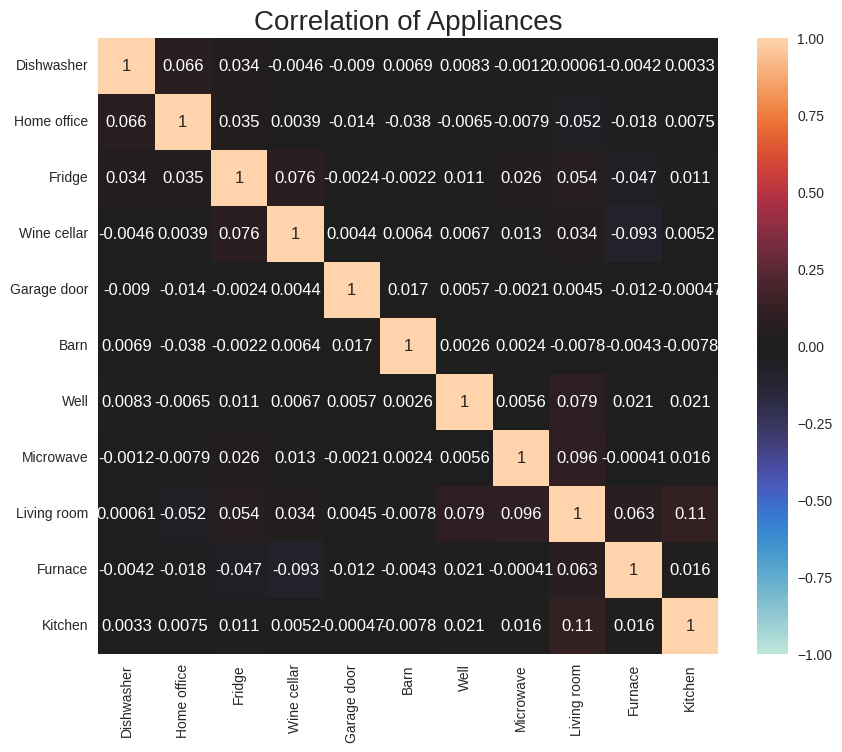

In [39]:
fig,ax = plt.subplots(figsize=(10, 8))
corr = df[['Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances',size=20)
plt.show()

Algunos aparatos se ven afectados por la información meteorológica. El frigorífico está relacionado con la temperatura, la temperatura aparente y el punto de rocío. La bodega está relacionada con la temperatura, la temperatura aparente y el punto de rocío. El horno está relacionado con la temperatura, la temperatura aparente, la velocidad del viento y el punto de rocío.

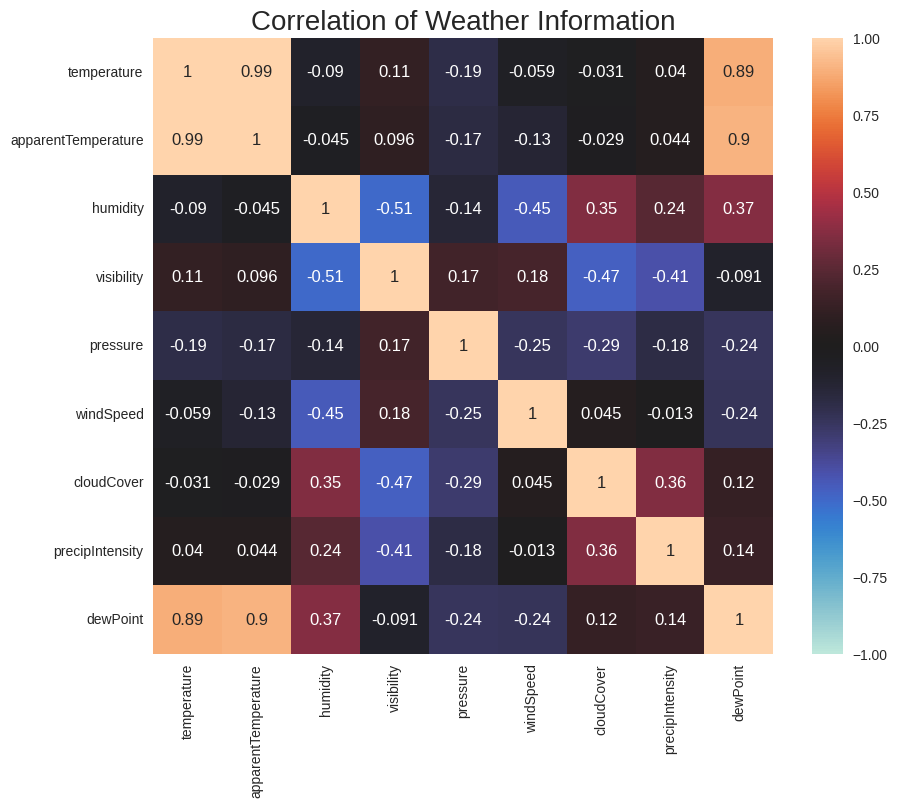

In [40]:
fig,ax = plt.subplots(figsize=(10, 8))
corr = df[['temperature','apparentTemperature','humidity','visibility','pressure','windSpeed','cloudCover','precipIntensity','dewPoint']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Weather Information',size=20)
plt.show()

Algunas informaciones meteorológicas están correlacionadas entre sí. La temperatura está relacionada con apparentTemperature y dewPoint. La humedad está relacionada con la visibilidad, la velocidad del viento, la nubosidad y el punto de rocío. La visibilidad está relacionada con la humedad, la velocidad del viento, la nubosidad y la intensidad de la precipitación. CloudCover está relacionado con la humedad, la visibilidad y precipIntensity. PrecipIntensity está relacionada con la visibilidad y el cloudCover. DewPoint está relacionado con la temperatura, apparentTemperature y la humedad

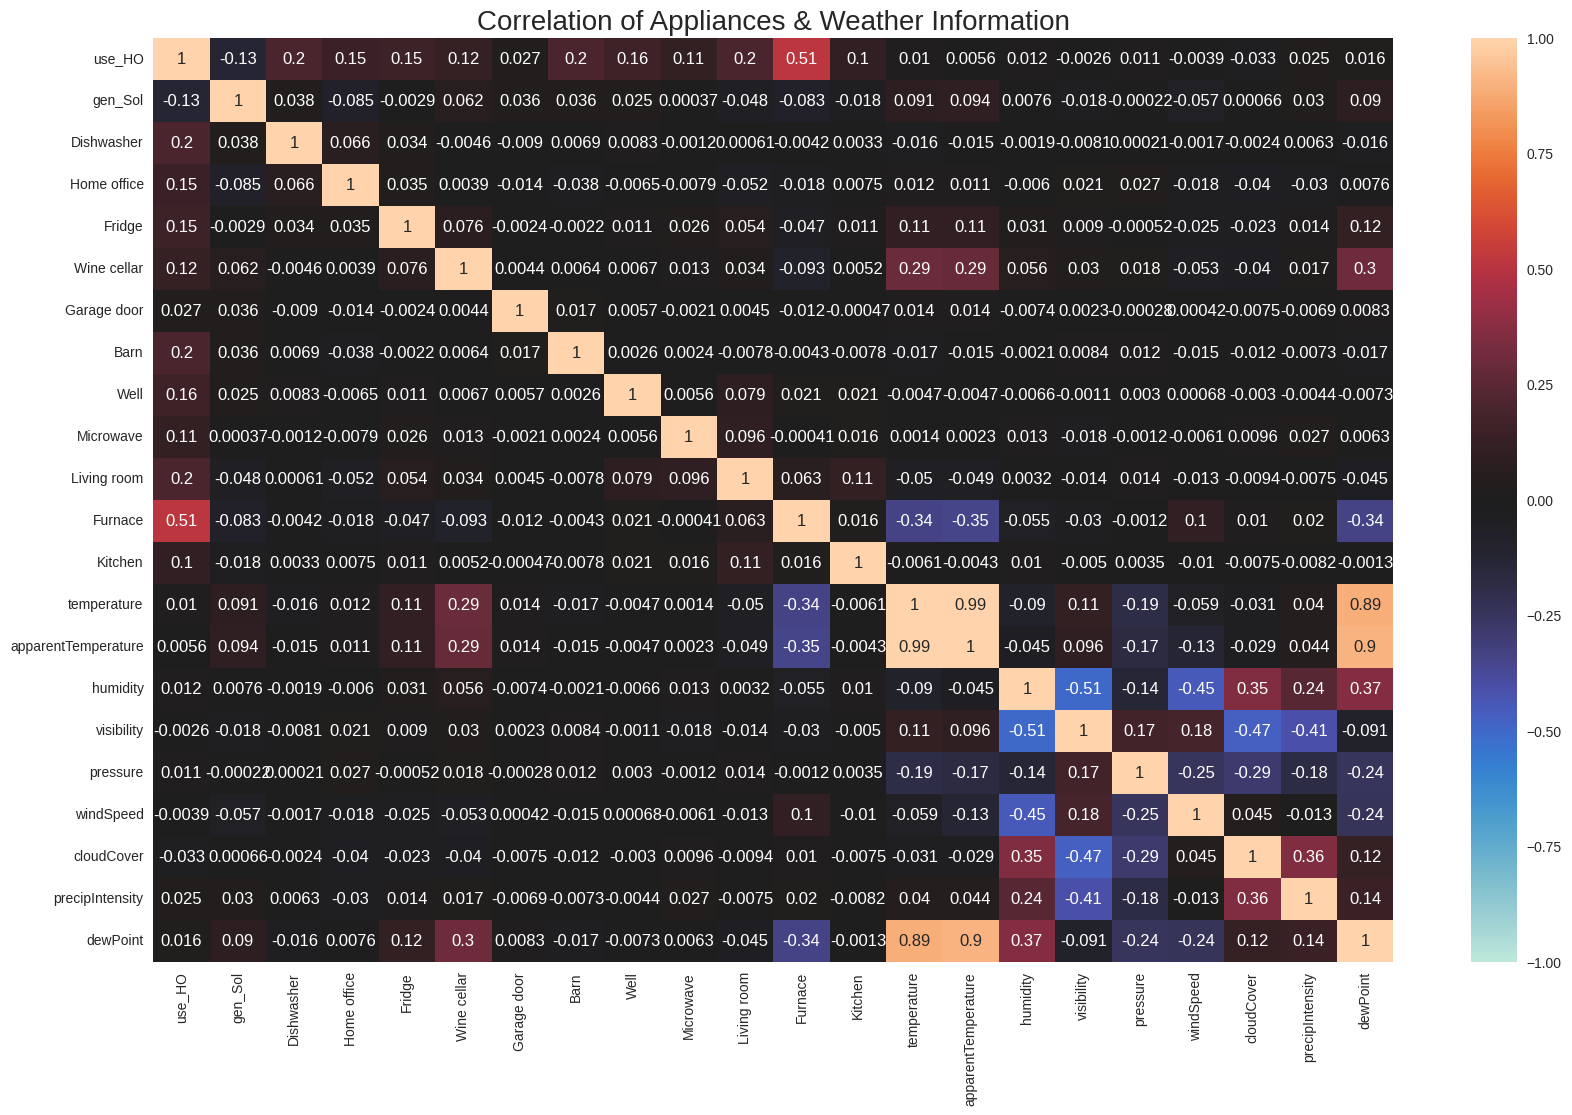

In [41]:
fig,ax = plt.subplots(figsize=(20, 12))
corr = df[['use_HO','gen_Sol','Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen',\
           'temperature','apparentTemperature','humidity','visibility','pressure','windSpeed','cloudCover','precipIntensity','dewPoint']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances & Weather Information',size=20)
plt.show()

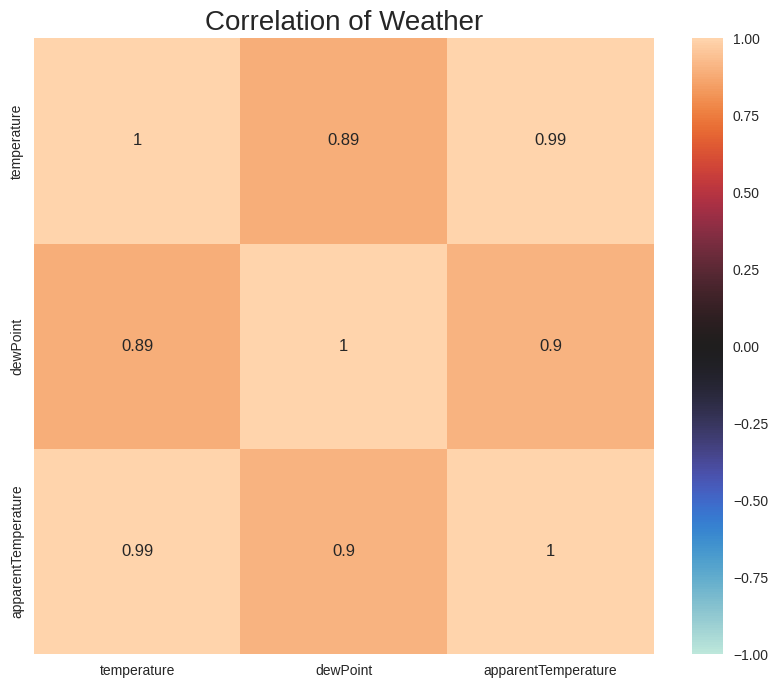

In [42]:
fig,ax = plt.subplots(figsize=(10, 8))
corr = df[['temperature','dewPoint','apparentTemperature']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Weather',size=20)
plt.show()

## Analicemos nuestra variable objetivo frente a las demás caracteristicas

## Aplicar Encoding a las características categóricas

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 503910 non-null  datetime64[ns]
 1   Dishwasher           503910 non-null  float64       
 2   Home office          503910 non-null  float64       
 3   Fridge               503910 non-null  float64       
 4   Wine cellar          503910 non-null  float64       
 5   Garage door          503910 non-null  float64       
 6   Barn                 503910 non-null  float64       
 7   Well                 503910 non-null  float64       
 8   Microwave            503910 non-null  float64       
 9   Living room          503910 non-null  float64       
 10  temperature          503910 non-null  float64       
 11  humidity             503910 non-null  float64       
 12  visibility           503910 non-null  

In [44]:
from sklearn.preprocessing import LabelEncoder
# Copiar el dataset para evitar modificar el original directamente
df_labeled = df.copy()

# Listar las columnas categóricas
categorical_columns = ['weekday', 'timing', 'time']

# Aplicar Label Encoding para cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Mostrar las primeras filas del Dataframe codificado(encoded)
#print(df_labeled.head())
df_labeled.head()

,time,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,year,month,day,weekday,weekofyear,hour,minute,timing,use_HO,gen_Sol
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,2016,1,1,0,53,5,0,2,0.932833,0.003483
2016-01-01 05:01:00,1,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,2016,1,1,0,53,5,1,2,0.934333,0.003467
2016-01-01 05:02:00,2,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,2016,1,1,0,53,5,2,2,0.931817,0.003467
2016-01-01 05:03:00,3,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,2016,1,1,0,53,5,3,2,1.022050,0.003483
2016-01-01 05:04:00,4,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,2016,1,1,0,53,5,4,2,1.139400,0.003467


In [45]:
# Imprimimos el DataSet codificado (encoded)
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  int64  
 1   Dishwasher           503910 non-null  float64
 2   Home office          503910 non-null  float64
 3   Fridge               503910 non-null  float64
 4   Wine cellar          503910 non-null  float64
 5   Garage door          503910 non-null  float64
 6   Barn                 503910 non-null  float64
 7   Well                 503910 non-null  float64
 8   Microwave            503910 non-null  float64
 9   Living room          503910 non-null  float64
 10  temperature          503910 non-null  float64
 11  humidity             503910 non-null  float64
 12  visibility           503910 non-null  float64
 13  apparentTemperature  503910 non-null  float64
 14  pressure             503910 non-nu

## Tratamiento para las características numéricas

## Distribución para las características numéricas

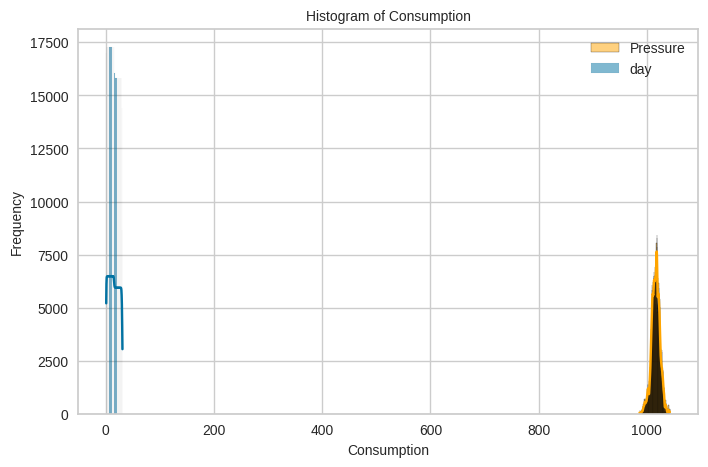

In [46]:
# Consumo de Energía con relación a las condiciones metereológicas

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="pressure", kde=True, label = "Pressure",color = "orange")
sns.histplot(data=df, x="day", kde=True, label = "day")
plt.xlabel('Consumption', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Consumption', fontsize=10)
plt.legend()
plt.show()

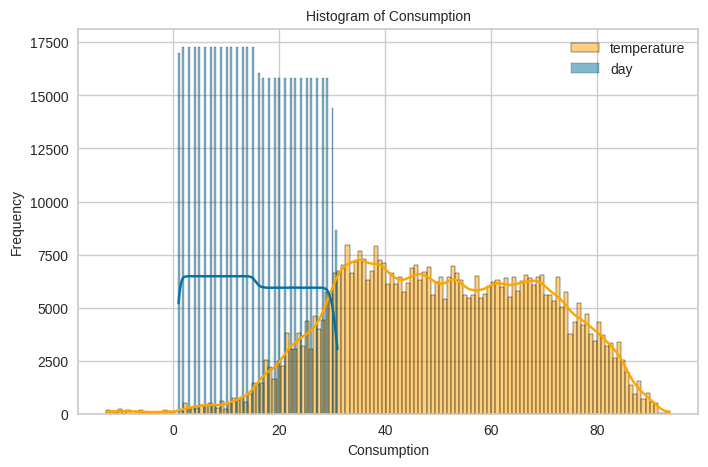

In [47]:
# Consumo de Energía con relación a las condiciones meteorológicas

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="temperature", kde=True, label = "temperature",color = "orange")
sns.histplot(data=df, x="day", kde=True, label = "day")
plt.xlabel('Consumption', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Consumption', fontsize=10)
plt.legend()
plt.show()

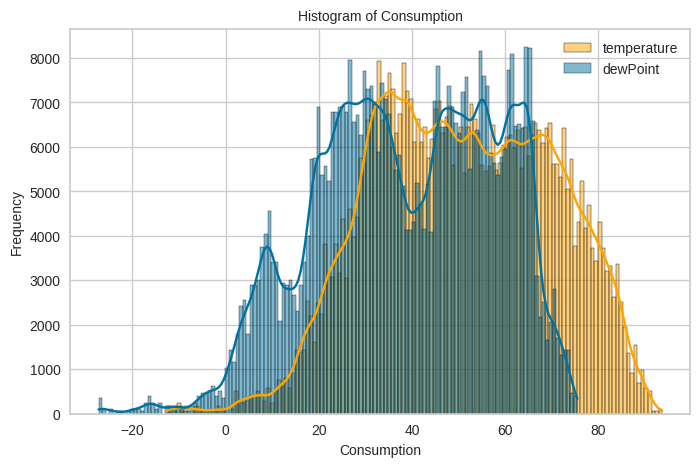

In [48]:
# Consumo de Energía con relación a las condiciones meteorológicas

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="temperature", kde=True, label = "temperature",color = "orange")
sns.histplot(data=df, x="dewPoint", kde=True, label = "dewPoint")
plt.xlabel('Consumption', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Consumption', fontsize=10)
plt.legend()
plt.show()

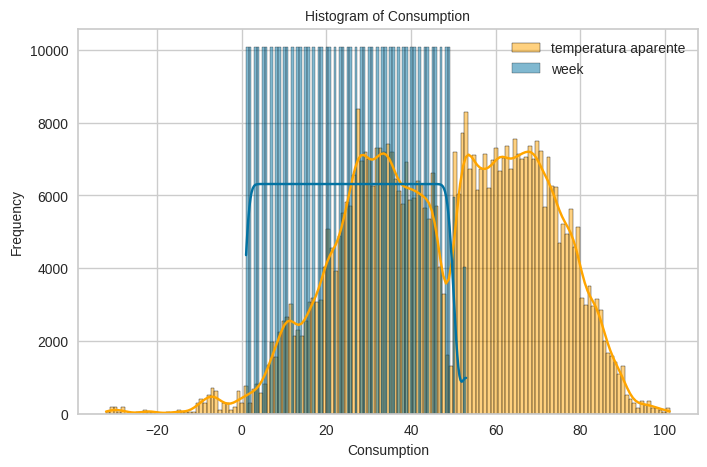

In [49]:
# Consumo de Energía con relación a las condiciones meteorológicas

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="apparentTemperature", kde=True, label = "temperatura aparente",color = "orange")
sns.histplot(data=df, x="weekofyear", kde=True, label = "week")
plt.xlabel('Consumption', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Consumption', fontsize=10)
plt.legend()
plt.show()

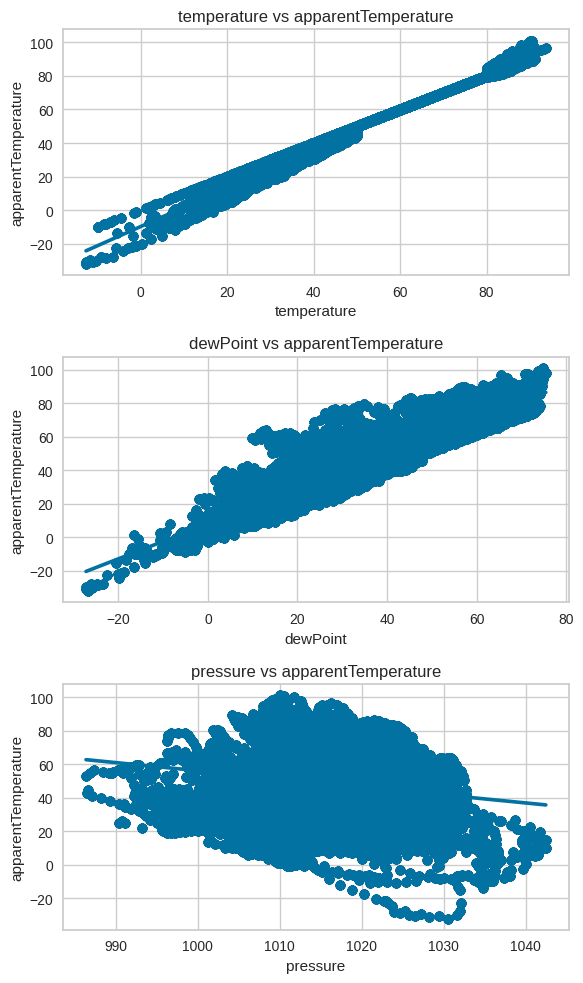

In [87]:
# Ver la relación entre las caracteristicas independientes y la variable objetivo (dependiente)
independent_variables = ['temperature', 'dewPoint', "pressure"]
target_variable = 'apparentTemperature'

plt.figure(figsize=(6,10))

for i, var in enumerate(independent_variables):
    plt.subplot(3,1, i + 1)
    sns.regplot(x=df[var], y=df[target_variable])
    plt.title(f'{var} vs {target_variable}')

plt.tight_layout()
plt.show()

In [88]:
# Dividir la Data, entre la función objetivo y el resto de los datos
X = df[["dewPoint", "temperature", "pressure"]]
y = df["apparentTemperature"]

In [89]:
X.head()

,dewPoint,temperature,pressure
time,,,
2016-01-01 05:00:00,24.4,36.14,1016.91
2016-01-01 05:01:00,24.4,36.14,1016.91
2016-01-01 05:02:00,24.4,36.14,1016.91
2016-01-01 05:03:00,24.4,36.14,1016.91
2016-01-01 05:04:00,24.4,36.14,1016.91


In [90]:
# Dividir el set de datos de pruebas y el set de datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
# Mostrar como se ha definido la distribución de Datos
print("Tamaño de la muestra incluida en el set de entrenamiento: {}\ny Tamaño de la muestra de entrenamiento: {}\nX Tamaño de la muestra que se incluye en el set de testing: {}\ny Tamaño de la muestra usada en prueba: {}"
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Tamaño de la muestra incluida en el set de entrenamiento: (352737, 3)
y Tamaño de la muestra de entrenamiento: (352737,)
X Tamaño de la muestra que se incluye en el set de testing: (151173, 3)
y Tamaño de la muestra usada en prueba: (151173,)


In [92]:
model_multi_lin_reg = LinearRegression()

In [93]:
model_multi_lin_reg.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model_multi_lin_reg.predict(X_test)
y_train_pred = model_multi_lin_reg.predict(X_train)

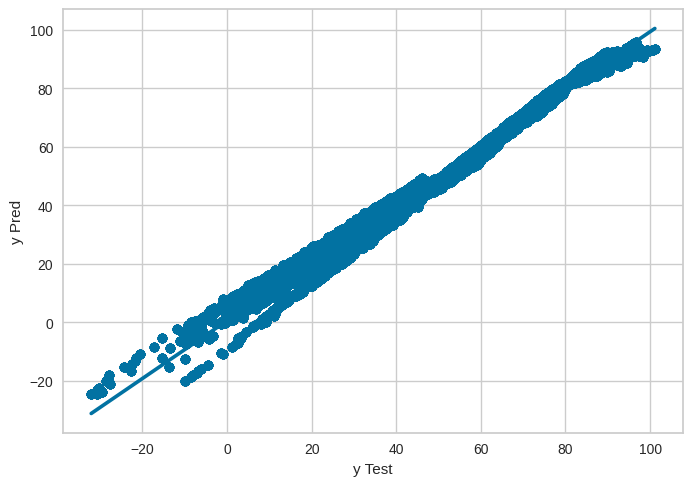

In [95]:
# Gráficar el comportamiento de la predicción y su ajuste frente al módelo lineal
sns.regplot(x=y_test, y=y_pred, ci=None)
plt.xlabel('y Test')
plt.ylabel('y Pred')
plt.show()

In [96]:
# Se imprimen las predicciones del modelo y se empiezan analizar los residuos obtenidos
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residual
time,,,
2016-09-28 19:52:00,52.95,51.749449,1.200551
2016-11-11 20:52:00,32.53,32.812788,-0.282788
2016-06-16 19:42:00,68.74,67.991678,0.748322
2016-10-14 03:07:00,39.33,41.874881,-2.544881
2016-02-10 14:44:00,-3.60,3.401083,-7.001083
...,...,...,...
2016-09-25 00:38:00,66.40,66.349290,0.050710
2016-11-19 10:09:00,34.41,35.089255,-0.679255
2016-09-30 17:27:00,61.71,60.340596,1.369404


In [97]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [98]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
mlr_score

,multi_train,multi_test
R2,0.988544,0.988551
mae,1.750418,1.747980
mse,5.569009,5.531383
rmse,2.359875,2.351889


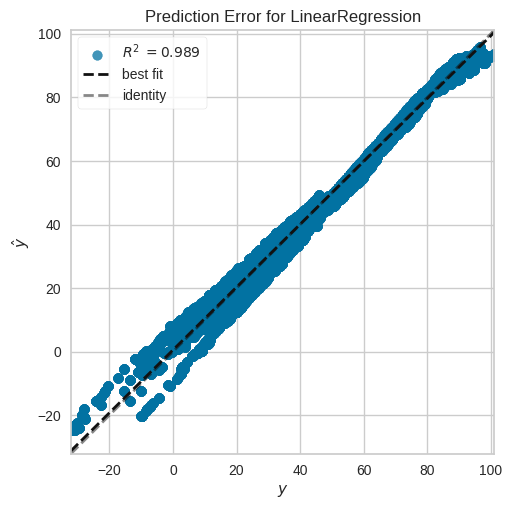

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [99]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Mostrar los datos de prueba
visualizer.score(X_test, y_test)  # Evaluar el modelo en estos datos de prueba
visualizer.show()                 # Mostrar la gráfica

In [101]:
X_train

,dewPoint,temperature,pressure
time,,,
2016-10-31 21:46:00,27.43,44.16,1018.82
2016-03-19 18:52:00,16.55,29.09,1017.93
2016-05-04 01:00:00,48.62,50.89,1004.23
2016-07-05 11:26:00,54.98,76.70,1018.21
2016-07-14 11:32:00,52.40,54.80,1021.03
...,...,...,...
2016-06-29 04:38:00,63.51,66.91,1009.43
2016-09-11 06:18:00,60.83,62.10,1019.42
2016-04-01 19:52:00,19.39,25.23,1015.61


In [102]:
y_train

,apparentTemperature
time,
2016-10-31 21:46:00,41.87
2016-03-19 18:52:00,20.62
2016-05-04 01:00:00,50.89
2016-07-05 11:26:00,76.70
2016-07-14 11:32:00,54.80
...,...
2016-06-29 04:38:00,66.91
2016-09-11 06:18:00,62.10
2016-04-01 19:52:00,15.57


In [103]:
import pickle

# Guardar el modelo en un archivo
with open('model.pkl', 'wb') as file:
    pickle.dump(model_multi_lin_reg, file)

In [104]:
#leer modelo
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [105]:
model.predict([[55,32, 1012]])

array([29.90534266])